[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Asus/nltk_data...


                                                text  compound_score sentiment
0  RT @prial78: Farmland abandonment is widesprea...          0.2617  positive
1  RT @mikewulder: NEW: Yin et al. Mapping agricu...         -0.5267  negative
2  Last chance to register! 🌳The discussions will...          0.3164  positive

Sentiment Distribution:
sentiment
positive    2
negative    1
Name: count, dtype: int64


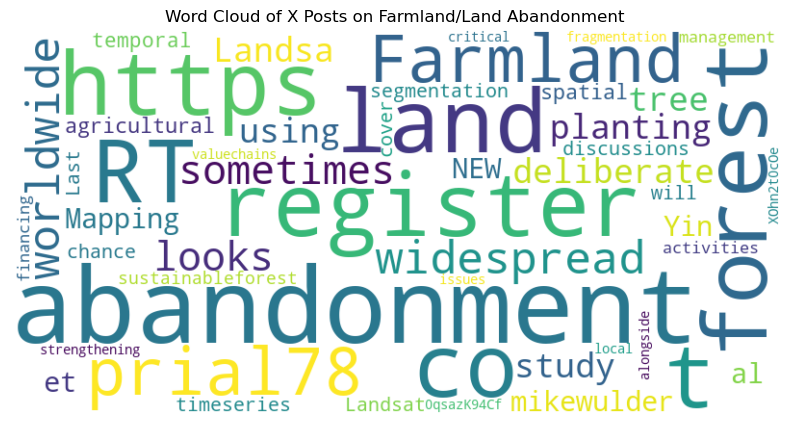

In [1]:
import tweepy
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download VADER lexicon (run once)
nltk.download('vader_lexicon')

# X API v2 credentials (replace with your own)
BEARER_TOKEN = "My_Bearer_Token"

# Authenticate using tweepy Client (API v2)
client = tweepy.Client(bearer_token=BEARER_TOKEN)

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Keywords to search
keywords = '"Farmland Abandonment" OR "Land Abandonment"'

# Fetch recent tweets (max 100 due to API limits)
response = client.search_recent_tweets(query=keywords, max_results=100, tweet_fields=["text"])

# Store results
results = []
all_text = ""

if response.data:
    for post in response.data:
        text = post.text
        all_text += text + " "  # Add text to word cloud data

        # Get sentiment scores
        scores = sid.polarity_scores(text)
        compound_score = scores['compound']

        # Classify sentiment
        sentiment = "positive" if compound_score >= 0.05 else "negative" if compound_score <= -0.05 else "neutral"

        # Append to results
        results.append({
            "text": text,
            "compound_score": compound_score,
            "sentiment": sentiment
        })

# Convert to DataFrame
df = pd.DataFrame(results)
print(df)

# Save results to CSV
df.to_csv("sentiment_analysis_results.csv", index=False)

# Summary of sentiments
print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", min_font_size=10).generate(all_text)

# Display Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of X Posts on Farmland/Land Abandonment")
plt.show()
